# SALES PERFORMANCE ANALYSIS AND BUSINESS INSIGHTS PROJECT

IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LOADING DATA......

In [3]:
df = pd.read_csv("data/salesdata.csv",encoding='latin1')
df.head()


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30.0,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2.0,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34.0,81.35,5,2765.90,05-07-2003 00:00,Shipped,2,5.0,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41.0,94.74,2,3884.34,07-01-2003 00:00,Shipped,3,NaN,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45.0,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8.0,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49.0,100.00,14,5205.27,10-10-2003 00:00,Shipped,4,10.0,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


INSPECTING DATA

In [4]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2822 non-null   float64
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2822 non-null   float64
 5   ORDERDATE         2821 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2822 non-null   float64
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2821 non-null   object 
 11  MSRP              2821 non-null   float64
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2814 non-null   object 
 14  PHONE             2821 non-null   object 
 15  ADDRESSLINE1      2822 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2822.000000,2823.000000,2823.000000,2822.000000,2823.000000,2822.000000,2823.00000,2821.000000
mean,10258.725115,35.093905,83.658544,6.466171,3554.263317,2.717676,7.092488,2003.81509,100.677419
std,92.085478,9.742995,20.174277,4.225841,1842.084177,1.203878,3.657281,0.69967,40.145358
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.270000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


CLEANING DATA

In [5]:
df = df.dropna() # Removed missing values to ensure accurate and complete analysis.
df = df.drop_duplicates()  # Removed duplicate records to avoid double-counting in sales figures.
df["QUANTITYORDERED"] = df["QUANTITYORDERED"].astype(int)  # Converted quantity to integer type for correct numerical operations.
df["ORDERDATE"] = pd.to_datetime(df["ORDERDATE"],format="mixed") # Standardized order dates for proper time-based analysis.
df = df.rename(columns={"SALES" :"TOTAL SALES", "PRICEEACH" : "UNIT PRICE" })  # Renamed columns for clarity and consistency in reporting.
df.to_csv("data/cleaned_salesdata.csv",index=False) # Exported the cleaned dataset for further analysis and backup.

ANALYSING DATA

In [6]:
top_product = df.groupby("PRODUCTLINE")[["TOTAL SALES","QUANTITYORDERED"]].sum().sort_values(  by = "TOTAL SALES" ,ascending = False)  #Classic Cars is the highest revenue-generating product line.

top_city = df.groupby(["STATE","CITY"])["TOTAL SALES"].sum().sort_values( ascending = False) # Victoria is the top-performing state with Melbourne leading in total sales.

top_customer = df.groupby(["CONTACTFIRSTNAME","CONTACTLASTNAME"])[["QUANTITYORDERED" , "TOTAL SALES" ]].sum().sort_values( by ="TOTAL SALES" , ascending = False) # Peter Ferguson is the top customer with the highest total sales contribution.


top_year = df.groupby("YEAR_ID")[["QUANTITYORDERED","TOTAL SALES"]].sum().sort_values( by ="TOTAL SALES" , ascending = False) # The year 2004 recorded the highest total sales overall.

In [7]:
top_product

,TOTAL SALES,QUANTITYORDERED
PRODUCTLINE,,
Classic Cars,161870.46,1582
Vintage Cars,138332.98,1359
Motorcycles,74025.67,735
Trucks and Buses,66020.96,614
Planes,63772.09,662
Ships,1089.36,24


In [8]:
top_city

STATE     CITY        
Victoria  Melbourne       200995.41
NSW       North Sydney    153996.13
          Chatswood       150119.98
Name: TOTAL SALES, dtype: float64

In [9]:
top_customer

,,QUANTITYORDERED,TOTAL SALES
CONTACTFIRSTNAME,CONTACTLASTNAME,,
Peter,Ferguson,1926,200995.41
Anna,O'Hara,1469,153996.13
Adrian,Huxley,1581,150119.98


In [10]:
top_year

,QUANTITYORDERED,TOTAL SALES
YEAR_ID,,
2004,2118,218610.86
2003,1731,177516.81
2005,1127,108983.85


 ##### USING NUMPY FOR ADVANCE ANALYSIS

In [11]:
sales = df["TOTAL SALES"].values
mean = np.mean(sales)                # average sales
median = np.median(sales)            # middle value
std = np.std(sales)                  # standard deviation
percentile = np.percentile(sales,90) # 90th percentile

In [12]:
np.corrcoef(df["QUANTITYORDERED"],df["TOTAL SALES"]) # this shows us the correlation between quantity ordered and it +0.490968 which means that the correlation between quantity ordered and total sales in moderate positive.

array([[1.        , 0.49096832],
       [0.49096832, 1.        ]])

SHOWING THE TOP PRODUCT LINE WITH THE HELP OF THE BAR GRAPH

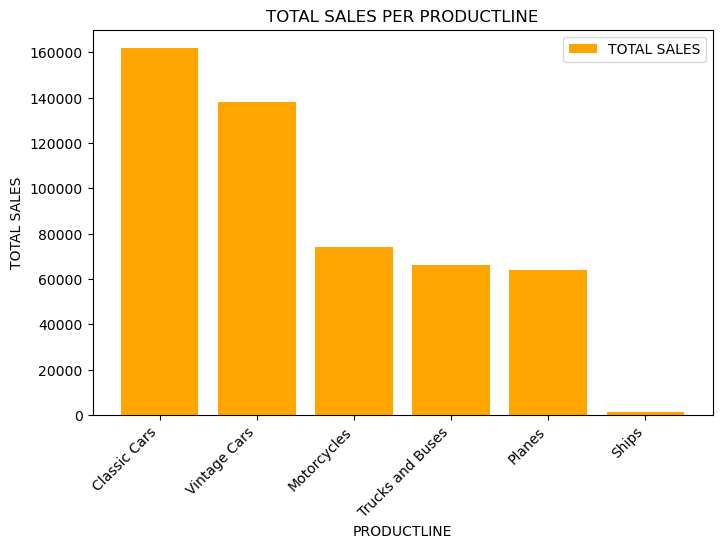

In [13]:
top_product = top_product.reset_index()
plt.figure(figsize=(8,5))
plt.bar(top_product["PRODUCTLINE"],top_product["TOTAL SALES"],color="orange",label="TOTAL SALES")
plt.xticks(rotation=45, ha='right')
plt.title("TOTAL SALES PER PRODUCTLINE")
plt.xlabel("PRODUCTLINE")
plt.ylabel("TOTAL SALES")
plt.legend()
plt.savefig("TOTAL SALES PER PRODUCTLINE.png",dpi=300,bbox_inches='tight')
plt.show()

SHOWING THE TOTAL SALES PER CITY WITH THE HELP OF THE PIE CHART

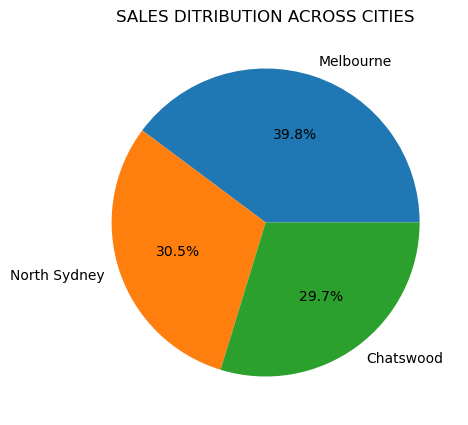

In [14]:
top_city =top_city.reset_index()
plt.figure(figsize=(8,5))
plt.pie(top_city["TOTAL SALES"], labels=top_city["CITY"],autopct = "%1.1f%%" )
plt.xticks(rotation=45, ha='right')
plt.title("SALES DITRIBUTION ACROSS CITIES")
plt.savefig("SALES DISTRIBUTION PIECHART.png",dpi=300,bbox_inches='tight')
plt.show()

SALES PER YEAR WITH THE HELP OF BAR GRAPH

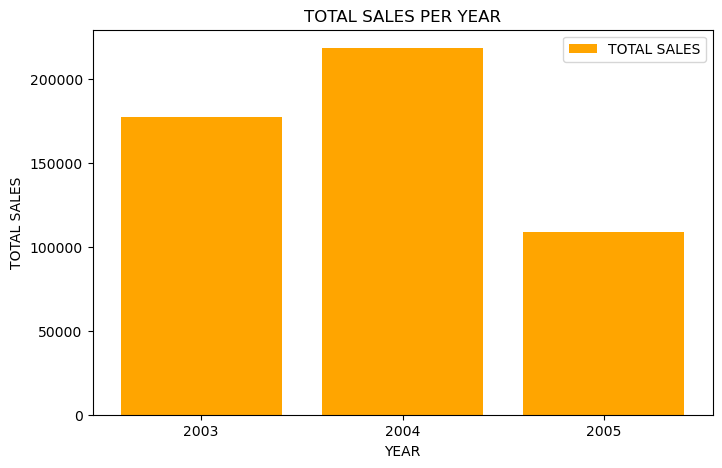

In [15]:
top_year = top_year.reset_index()
plt.figure(figsize=(8,5))
plt.bar(top_year["YEAR_ID"], top_year["TOTAL SALES"], color="orange",label="TOTAL SALES")
plt.xticks(top_year["YEAR_ID"])
plt.title("TOTAL SALES PER YEAR")
plt.xlabel("YEAR")
plt.ylabel("TOTAL SALES")
plt.legend()
plt.savefig("TOTAL SALES PER YEAR.png",dpi=300,bbox_inches='tight')
plt.show()

SALES PER MONTH WITH THE HELP OF LINE GRAPH

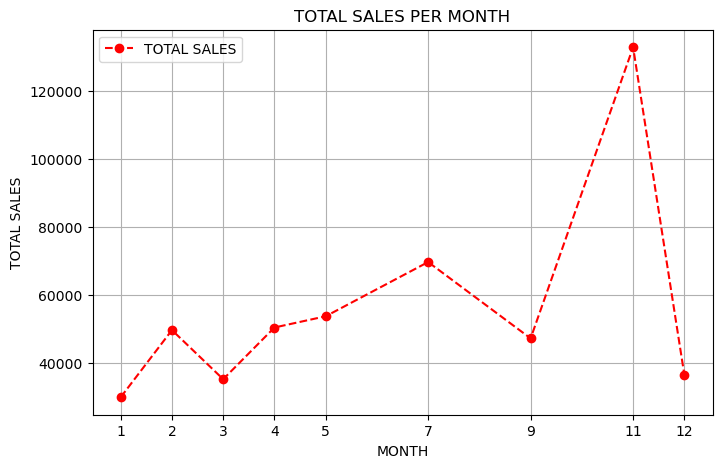

In [16]:
top_month = df.groupby("MONTH_ID")["TOTAL SALES"].sum()
top_month = top_month.reset_index()
plt.figure(figsize=(8,5))
plt.plot(top_month["MONTH_ID"],top_month["TOTAL SALES"],label="TOTAL SALES",color="red",linestyle="dashed",marker="o")
plt.xticks(top_month["MONTH_ID"])
plt.title("TOTAL SALES PER MONTH")
plt.xlabel("MONTH")
plt.ylabel("TOTAL SALES")
plt.grid()
plt.legend()
plt.savefig("TOTAL SALES PER MONTH.png",dpi=300,bbox_inches='tight')
plt.show()


# FINAL INSIGHTS
### TOP PRODUCT LINE
- **Classic Cars** is the highest revenue-generating product line.
- This indicates strong customer preference in this category.
- **Business Action**: Increase the production and marketing focus on  **Classic Cars**.
### TOP STATE AND CITY
- **Victoria**is the highest-performing state.
Within Victoria, **Melbourne** contributed the highest sales.
- **Business Action**: Explore more distribution channels in Victoria (especially Melbourne), to make our product more accessible to its customers.
Allocate more marketing budget in Melbourne to increase brand trust and loyalty.
### TOP CUSTOMER
**Peter Ferguson** generated the highest total purchase value.
- Shows strong customer loyalty and repeat buying behavior.
- **Business Action**:Provide special offers to our repeat customers to keep them loyal to our brand .
Advertise it to attract more customers.
### SALES PER YEAR
- **2004**recorded the highest overall sales .
- Indicates the strong upward trend in customer demand that year .
- **Business Action**:Review the major events , promotional strategies in **2004** to replicate it in the future.
### SALES PER MONTH
-Sales show fluctuations across months , spiked in the month of **November** then drastically declined in the month of **december**, showing us the noticeable seasonal patterns.
- **Business Action**:Forecast high demand months and plan inventory accordingly.
- Provide discounts and offers to the customer based on the monthly demand trends.
### **OVERALL CONCLUSION**
The sales dataset reveals strong customer demand in **Classic Cars**, a major sales contribution comes from the state of **Victoria** (especially **Melbourne**),and peak sales are in the year **2004**.Monthly sales pattern indicates seasonal demand. These insights help guide marketing, inventory planning and customer relationship strategies.